<a href="https://colab.research.google.com/github/247598/Codsoft-Titanic-Survival-Prediction-Logeshwar-U/blob/main/Sales_Prediction_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats as stats

In [ ]:
sales = pd.read_csv("advertising.csv")
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


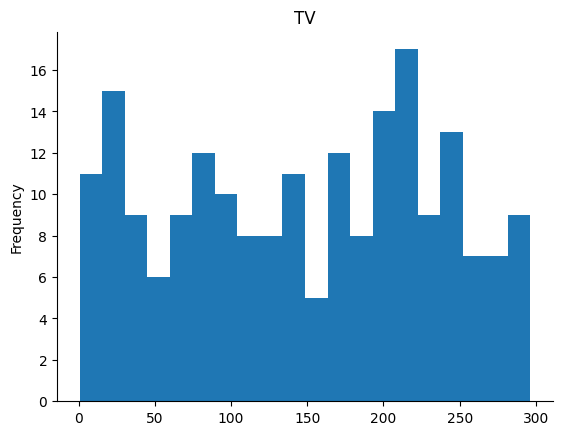

In [ ]:
from matplotlib import pyplot as plt
sales['TV'].plot(kind='hist', bins=20, title='TV')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
sales["TV"]

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

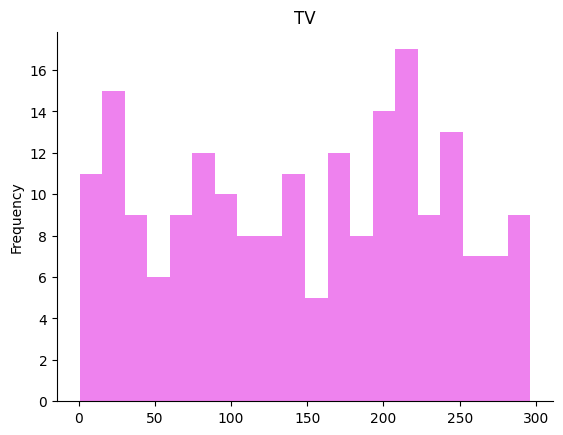

In [ ]:
from matplotlib import pyplot as plt
sales['TV'].plot(kind='hist', bins=20, title='TV', color='violet')
plt.gca().spines[['top','right']].set_visible(False)

In [ ]:
sales["Radio"]

0      37.8
1      39.3
2      45.9
3      41.3
4      10.8
       ... 
195     3.7
196     4.9
197     9.3
198    42.0
199     8.6
Name: Radio, Length: 200, dtype: float64

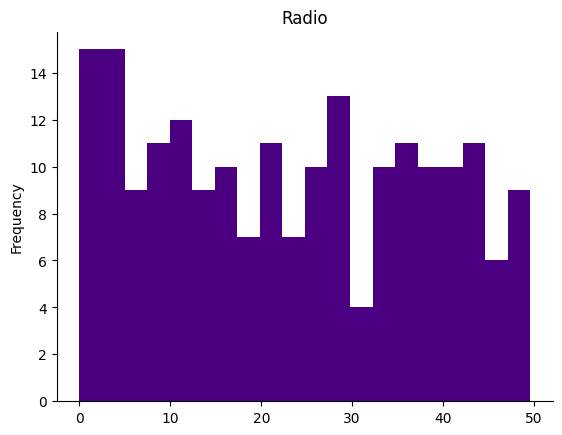

In [ ]:
from matplotlib import pyplot as plt
sales['Radio'].plot(kind='hist', bins=20, title='Radio',color='indigo')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
sales["Sales"]

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

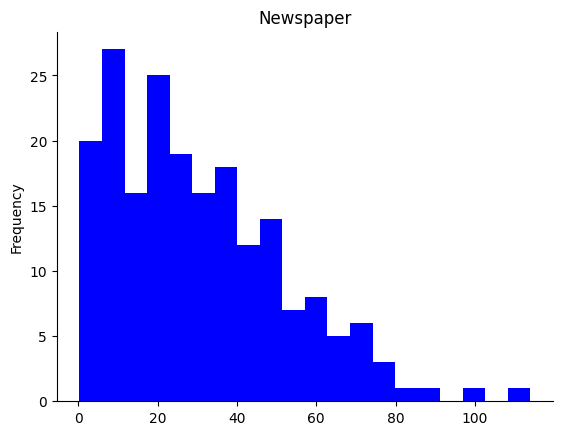

In [ ]:
from matplotlib import pyplot as plt
sales['Newspaper'].plot(kind='hist', bins=20, title='Newspaper',color='blue')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
sales['Sales']

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

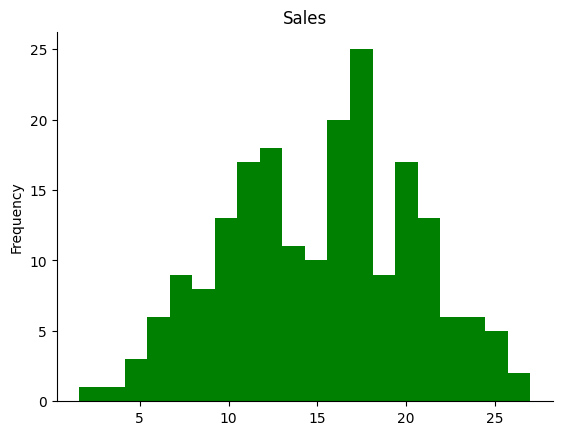

In [ ]:
from matplotlib import pyplot as plt
sales['Sales'].plot(kind='hist', bins=20, title='Sales',color='green')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
X = sales['TV']
y = sales['Sales']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
X_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [ ]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [ ]:
!pip install statsmodels

In [ ]:
import statsmodels.api as sn

In [ ]:
X_train_sn = sn.add_constant(X_train)

In [ ]:
lr = sn.OLS(y_train, X_train_sn).fit()

In [ ]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           1.52e-52
Time:                        12:41:41   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

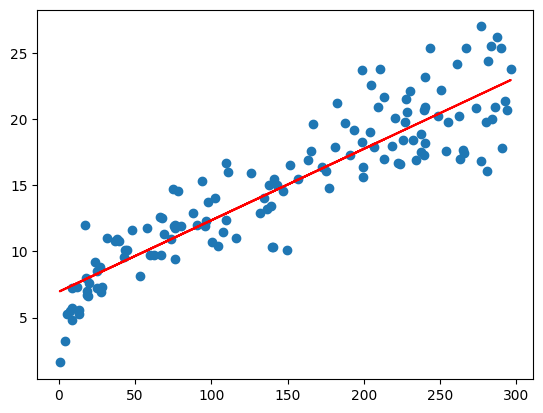

In [ ]:
plt.scatter(X_train , y_train)
plt.plot(X_train , 6.948 + 0.054*X_train, 'r')
plt.show()

In [ ]:
y_train_pred = lr.predict(X_train_sn)
res = (y_train - y_train_pred)

<ipython-input-42-fff7e6124494>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res , bins = 15)


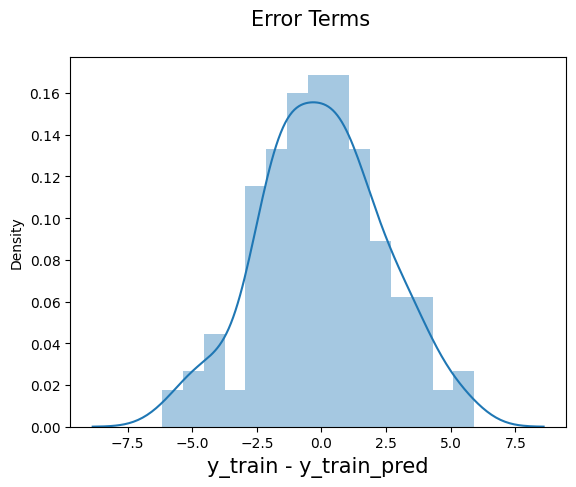

In [ ]:
fig = plt.figure()
sns.distplot(res , bins = 15)
fig.suptitle('Error Terms' , fontsize = 15)
plt.xlabel('y_train - y_train_pred' , fontsize = 15)
plt.show()

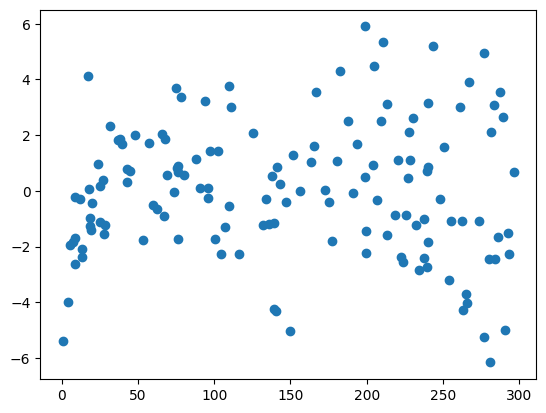

In [ ]:
plt.scatter(X_train,res)
plt.show()

In [ ]:
X_test_sn = sn.add_constant(X_test)
y_pred = lr.predict(X_test_sn)

In [ ]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [52]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [57]:
np.sqrt(mean_squared_error(y_test , y_pred))

2.019296008966232

In [59]:
r_squared = r2_score(y_test , y_pred)
r_squared

0.792103160124566

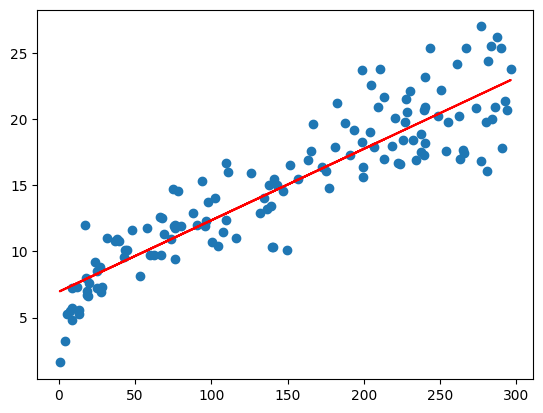

In [60]:
plt.scatter(X_train , y_train)
plt.plot(X_train , 6.948 + 0.054*X_train, 'r')
plt.show()